<a href="https://colab.research.google.com/github/JuanJoseMV/neuraltextgen/blob/main/plotingResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!git clone --recursive https://github.com/JuanJoseMV/neuraltextgen.git

In [6]:
import os
import pandas as pd
directory = "/content/neuraltextgen/data/grid_search"
frames = []
i = 0
for filename in os.listdir(directory):
  if filename[:4] =="text":
    continue 
  with open(directory+"/"+filename, 'r') as f:
    frames.append(pd.read_csv(f))
    frames[i]["model"] = [filename[:-4] for x in range(0,72)]
  i += 1
DF = pd.concat(frames)
DF["Id"] = [x for x in range(len(DF))]
DF

,n_sentences,batch_size,avg_len,max_len,generation_method,masked_portion,max_iter,std_len,init_mask_prob,temperature,sample,top_k,mean_tbc,std_tbc,mean_wiki,std_wiki,count,model,Id
0,50,10,40,50,parallel,0.15,100,0,0,0.1,False,0,0.048,0.004,0.059,0.008,5,parallel-0.15,0
1,50,10,40,50,parallel,0.15,100,0,0,0.1,True,0,0.051,0.005,0.061,0.007,5,parallel-0.15,1
2,50,10,40,50,parallel,0.15,100,0,0,0.1,True,100,0.052,0.006,0.065,0.002,5,parallel-0.15,2
3,50,10,40,50,parallel,0.15,100,0,0,1.0,False,0,0.048,0.003,0.061,0.005,5,parallel-0.15,3
4,50,10,40,50,parallel,0.15,100,0,0,1.0,True,0,0.027,0.001,0.028,0.002,5,parallel-0.15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,50,10,40,50,parallel,1.00,100,5,1,1.0,False,0,0.146,0.070,0.069,0.021,5,Parallel-1,283
68,50,10,40,50,parallel,1.00,100,5,1,1.0,True,0,0.052,0.005,0.052,0.006,5,Parallel-1,284
69,50,10,40,50,parallel,1.00,100,5,1,1.0,True,100,0.075,0.003,0.065,0.006,5,Parallel-1,285
70,50,10,40,50,parallel,1.00,100,5,1,10.0,False,0,0.182,0.119,0.047,0.007,5,Parallel-1,286


In [2]:
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Data Science and Engineering - PoliTo2/2nd Semester/Machine Learning and Deep Learning/Project - NeuralTextGeneration/GridSearch results analysis/Parallel-1.csv"

df = pd.read_csv(path)
df["Id"] = [x for x in range(0,72)]
df

,n_sentences,batch_size,avg_len,max_len,generation_method,masked_portion,max_iter,std_len,init_mask_prob,temperature,sample,top_k,mean_tbc,std_tbc,mean_wiki,std_wiki,count,Id
0,50,10,40,50,parallel,1,100,0,0,0.1,False,0,0.046,0.003,0.060,0.004,5,0
1,50,10,40,50,parallel,1,500,5,0,10.0,True,0,0.009,0.000,0.010,0.000,5,1
2,50,10,40,50,parallel,1,500,5,0,10.0,True,100,0.022,0.001,0.023,0.001,5,2
3,50,10,40,50,parallel,1,500,5,1,0.1,False,0,0.110,0.077,0.033,0.008,5,3
4,50,10,40,50,parallel,1,500,5,1,0.1,True,0,0.112,0.041,0.057,0.010,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,50,10,40,50,parallel,1,100,5,1,1.0,False,0,0.146,0.070,0.069,0.021,5,67
68,50,10,40,50,parallel,1,100,5,1,1.0,True,0,0.052,0.005,0.052,0.006,5,68
69,50,10,40,50,parallel,1,100,5,1,1.0,True,100,0.075,0.003,0.065,0.006,5,69
70,50,10,40,50,parallel,1,100,5,1,10.0,False,0,0.182,0.119,0.047,0.007,5,70


In [3]:
import matplotlib.pyplot as plt
def verticalDotPlot(id, tbc_score, wiki_score, title, xlabel, ylabel):
    # Get the plot aspect right for thinner bars that aren't too spread out
  if len(id) >= 12:
    fig, ax = plt.subplots(figsize=(12,len(id)/4))
  else:
    fig, ax = plt.subplots(figsize=(12,3))

  # Create the bars
  # The parameters are:
  #   - the number of bars for the y-axis
  #   - the values from the first column of data
  #   - the width of the bars out to the points
  #   - color = the color of the bars
  #   - edgecolor = the color of the bars' borders
  #   - alpha = the transparency of the bars
  bars = ax.barh(range(len(tbc_score)), list(tbc_score), 0.001,
                  color="lightgray", edgecolor="lightgray", alpha=0.4)

  # Create the points using normal x-y scatter coordinates
  # The parameters are:
  #   - the x values from the first column of the data
  #   - the y values, which are just the indices of the data
  #   - the size of the points
  points = ax.scatter(list(tbc_score), range(len(id)), s=30)
  points2 = ax.scatter(list(wiki_score), range(len(id)), s=30)

  # Create the ytic locations centered on the bars
  yticloc = []
  [yticloc.append(bar.get_y() + bar.get_height()/2.) for bar in bars]

  # Turn off all of the borders
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # set all of the ticks to 0 length
  ax.tick_params(axis=u'both', which=u'both',length=0)

  # set the tic locations and labels
  ax.set_yticks(yticloc)
  ax.set_yticklabels(list(id))

  # set the x- and y-axis limits a little bigger so things look nice
  maxN = max(max(tbc_score), max(wiki_score))
  minN = min(min(tbc_score), min(wiki_score))
  ax.set_xlim([minN-minN/10,maxN+maxN/10])
  ax.set_ylim([-1,len(id)])

  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)

  # Turn on the X (vertical) gridlines
  ax.xaxis.grid(True)

  # Re-wrap the figure so everything fits
  plt.tight_layout(True)

In [4]:
import seaborn as sns
def comparativeBoxplot(x, y, hue=None, swarm = False):

  sns.set_theme(style="whitegrid")
  ax = sns.boxplot(x, y, hue)
  if swarm:
    ax = sns.swarmplot(x, y, color=".25")

  ax.set_ylim([0,0.2])

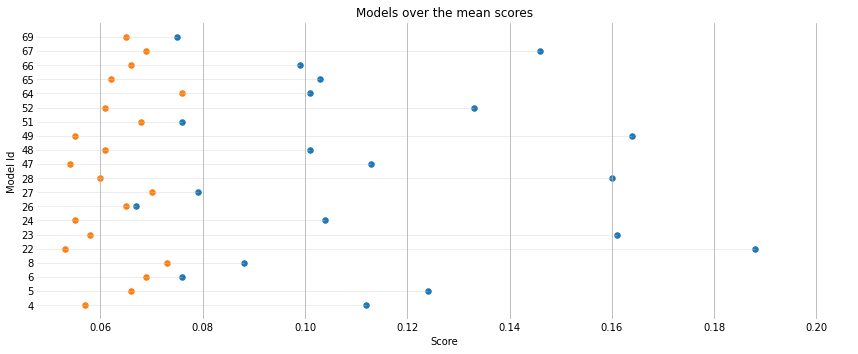

In [ ]:
means = df[["Id", "mean_tbc", "mean_wiki"]].copy()
means.mask(means[["mean_tbc", "mean_wiki"]]<=np.mean(means[["mean_tbc", "mean_wiki"]]), inplace=True)
means.dropna(inplace=True)
verticalDotPlot(means["Id"], means["mean_tbc"], means["mean_wiki"], "Models over the mean scores","Score", "Model Id")

In [ ]:
max_iterDF = df[["max_iter", "mean_tbc", "mean_wiki"]].copy()
max_iterDF.groupby(["max_iter"]).mean()

,mean_tbc,mean_wiki
max_iter,,
100,0.061111,0.048500
500,0.069889,0.054194


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

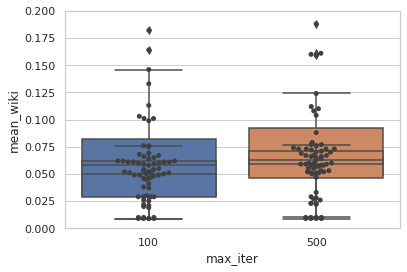

In [ ]:
comparativeBoxplot(df["max_iter"], df["mean_tbc"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


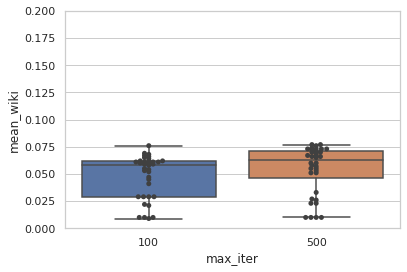

In [ ]:
comparativeBoxplot(df["max_iter"], df["mean_wiki"])

In [ ]:
std_lenDF = df[["std_len", "mean_tbc", "mean_wiki"]].copy()
std_lenDF.groupby(["std_len"]).mean()

,mean_tbc,mean_wiki
std_len,,
0,0.068,0.050778
5,0.063,0.051917


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


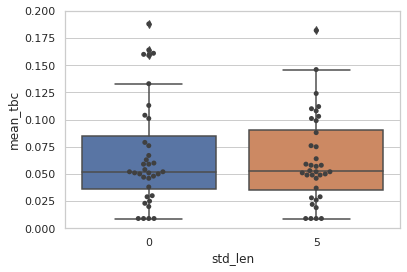

In [ ]:
comparativeBoxplot(df["std_len"], df["mean_tbc"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


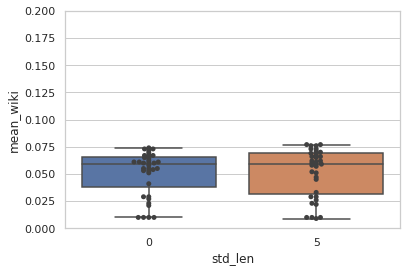

In [ ]:
comparativeBoxplot(df["std_len"], df["mean_wiki"])

In [ ]:
max_iterDF = df[["init_mask_prob", "mean_tbc", "mean_wiki"]].copy()
max_iterDF.groupby(["init_mask_prob"]).mean()

,mean_tbc,mean_wiki
init_mask_prob,,
0,0.042083,0.051611
1,0.088917,0.051083


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


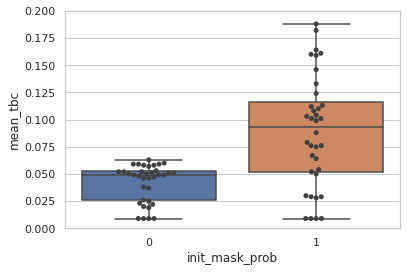

In [ ]:
comparativeBoxplot(df["init_mask_prob"], df["mean_tbc"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


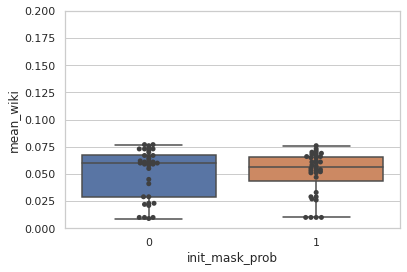

In [ ]:
comparativeBoxplot(df["init_mask_prob"], df["mean_wiki"])

In [ ]:
max_iterDF = df[["temperature", "mean_tbc", "mean_wiki"]].copy()
max_iterDF.groupby(["temperature"]).mean()

,mean_tbc,mean_wiki
temperature,,
0.1,0.083500,0.062500
1.0,0.068208,0.059250
10.0,0.044792,0.032292


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


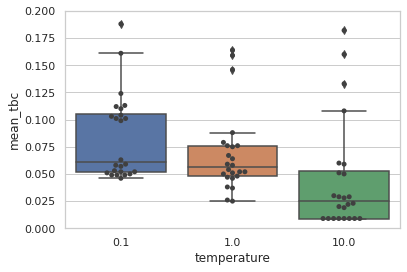

In [ ]:
comparativeBoxplot(df["temperature"], df["mean_tbc"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


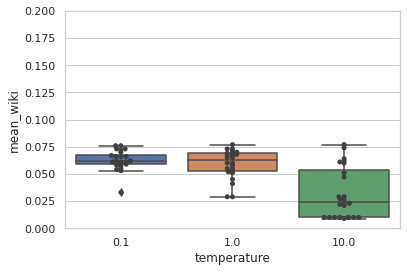

In [ ]:
comparativeBoxplot(df["temperature"], df["mean_wiki"])

In [ ]:
#sample	top_k
max_iterDF = df[["sample", "mean_tbc", "mean_wiki"]].copy()
max_iterDF.groupby(["sample"]).mean()

,mean_tbc,mean_wiki
sample,,
False,0.092625,0.062583
True,0.051938,0.045729


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


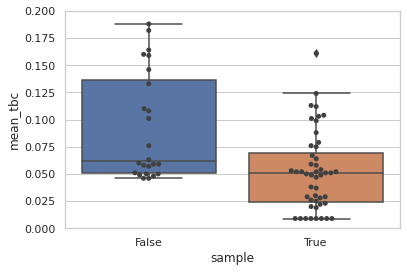

In [ ]:
comparativeBoxplot(df["sample"], df["mean_tbc"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


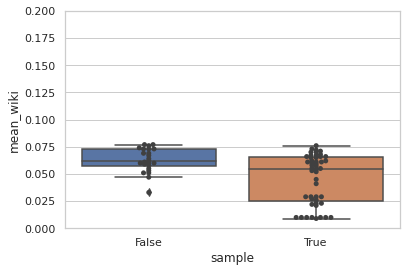

In [ ]:
comparativeBoxplot(df["sample"], df["mean_wiki"])

In [ ]:
max_iterDF = df[["top_k", "mean_tbc", "mean_wiki"]].copy()
max_iterDF.groupby(["top_k"]).mean()

,mean_tbc,mean_wiki
top_k,,
0,0.070437,0.051833
100,0.055625,0.050375


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


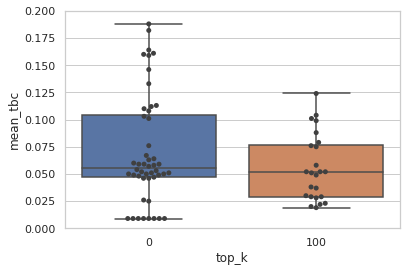

In [ ]:
comparativeBoxplot(df["top_k"], df["mean_tbc"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


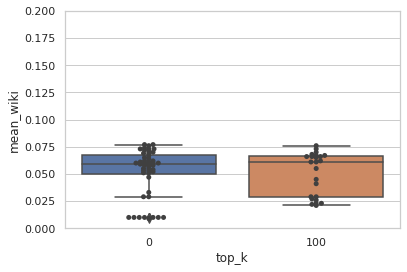

In [ ]:
comparativeBoxplot(df["top_k"], df["mean_wiki"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decr

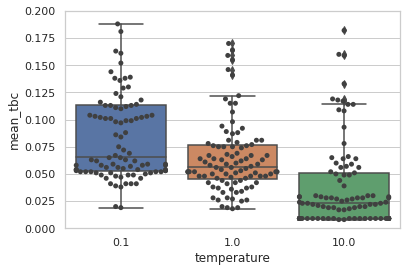

In [ ]:
comparativeBoxplot(DF["temperature"], DF["mean_tbc"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


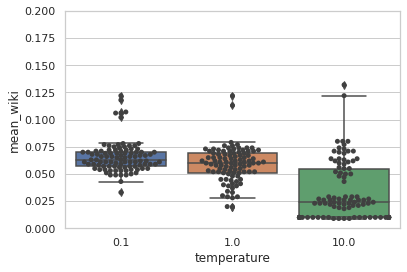

In [ ]:
comparativeBoxplot(DF["temperature"], DF["mean_wiki"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decre

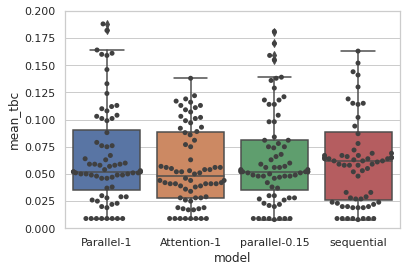

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_tbc"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


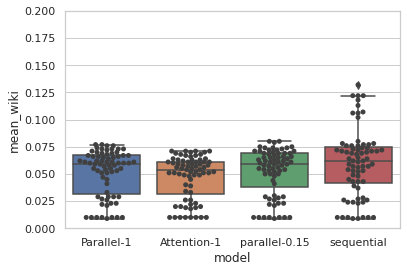

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_wiki"])

In [ ]:
modelsDF = DF[["model", "mean_tbc", "mean_wiki"]].copy()
modelsDF.groupby(["model"]).mean()

,mean_tbc,mean_wiki
model,,
Attention-1,0.056306,0.047208
Parallel-1,0.065500,0.051347
parallel-0.15,0.063611,0.052069
sequential,0.079944,0.060083


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


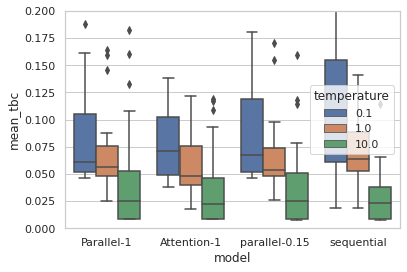

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_tbc"], DF["temperature"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


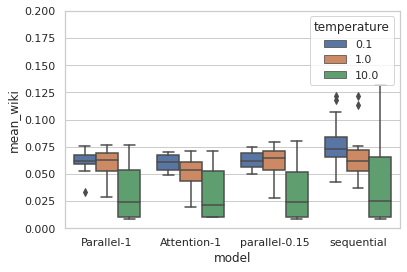

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_wiki"], DF["temperature"])

In [ ]:
modelsDF = DF[["temperature", "mean_tbc", "mean_wiki"]].copy()
modelsDF.groupby(["temperature"]).std()

,mean_tbc,mean_wiki
temperature,,
0.1,0.057062,0.014474
1.0,0.038385,0.015978
10.0,0.050986,0.026626


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


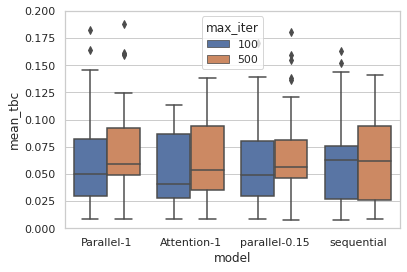

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_tbc"], DF["max_iter"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


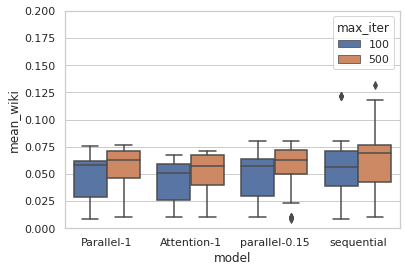

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_wiki"], DF["max_iter"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


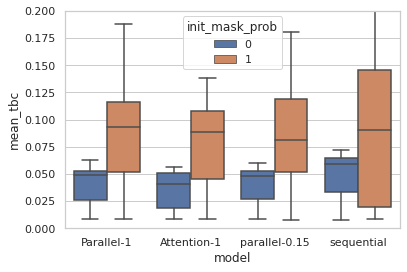

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_tbc"], DF["init_mask_prob"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


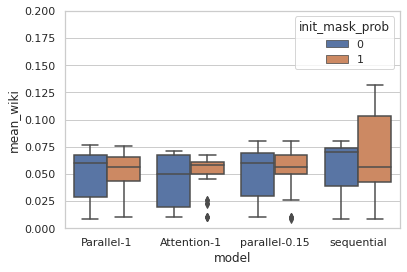

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_wiki"], DF["init_mask_prob"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


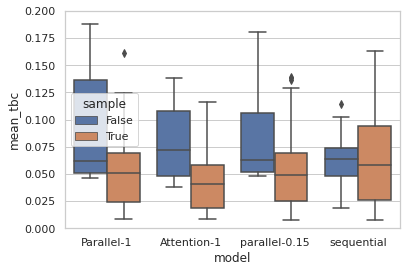

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_tbc"], DF["sample"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


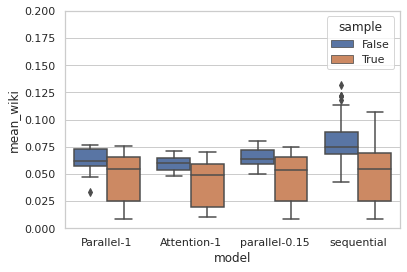

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_wiki"], DF["sample"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


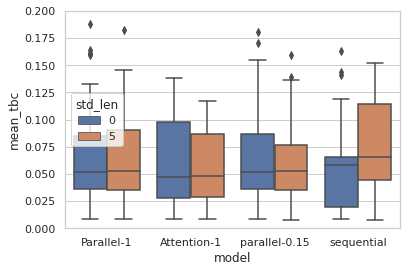

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_tbc"], DF["std_len"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


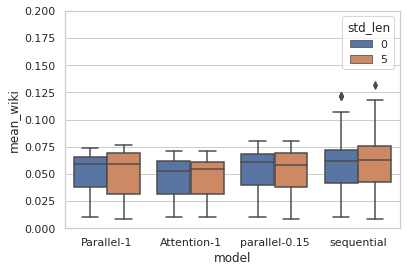

In [ ]:
comparativeBoxplot(DF["model"], DF["mean_wiki"], DF["std_len"])

In [ ]:
topkDF = DF[DF["sample"]==False]
topkDF

,n_sentences,batch_size,avg_len,max_len,generation_method,masked_portion,max_iter,std_len,init_mask_prob,temperature,sample,top_k,mean_tbc,std_tbc,mean_wiki,std_wiki,count,model,Id
0,50,10,40,50,parallel,1.0,100,0,0,0.1,False,0,0.046,0.003,0.060,0.004,5,Parallel-1,0
3,50,10,40,50,parallel,1.0,500,5,1,0.1,False,0,0.110,0.077,0.033,0.008,5,Parallel-1,3
6,50,10,40,50,parallel,1.0,500,5,1,1.0,False,0,0.076,0.015,0.069,0.027,5,Parallel-1,6
9,50,10,40,50,parallel,1.0,500,5,1,10.0,False,0,0.108,0.065,0.051,0.025,5,Parallel-1,9
13,50,10,40,50,parallel,1.0,500,0,0,0.1,False,0,0.063,0.005,0.073,0.006,5,Parallel-1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,50,10,40,50,sequential,1.0,500,5,0,1.0,False,0,0.067,0.006,0.076,0.004,5,sequential,273
60,50,10,40,50,sequential,1.0,500,5,0,10.0,False,0,0.065,0.005,0.073,0.002,5,sequential,276
63,50,10,40,50,sequential,1.0,500,5,1,0.1,False,0,0.293,0.098,0.118,0.035,5,sequential,279
66,50,10,40,50,sequential,1.0,500,5,1,1.0,False,0,0.261,0.059,0.113,0.007,5,sequential,282


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


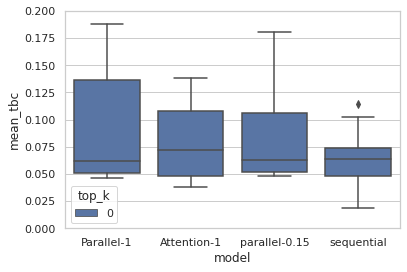

In [ ]:
comparativeBoxplot(topkDF["model"], topkDF["mean_tbc"], topkDF["top_k"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


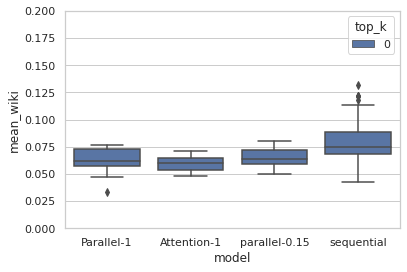

In [ ]:
comparativeBoxplot(topkDF["model"], topkDF["mean_wiki"], topkDF["top_k"])

Best combination for each model

In [23]:
set(DF["model"])

{'Attention-1', 'Parallel-1', 'parallel-0.15', 'sequential'}

In [53]:
means = DF[["Id", "model","mean_tbc", "mean_wiki"]].copy()
np.mean(means[["mean_tbc", "mean_wiki"]])

mean_tbc     0.066340
mean_wiki    0.052677
dtype: float64

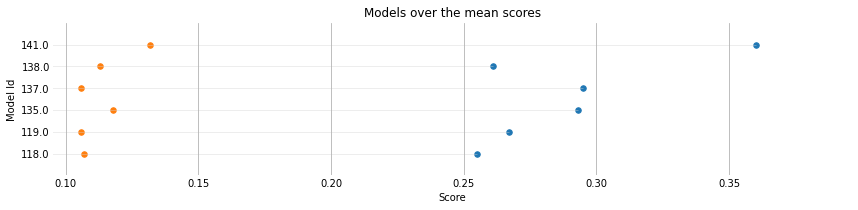

In [52]:
means = DF[["Id", "model","mean_tbc", "mean_wiki"]].copy()
means.mask(means[["mean_tbc", "mean_wiki"]]<=np.mean(means[["mean_tbc", "mean_wiki"]]*2), inplace=True)
means.mask(means["model"] != "sequential", inplace = True)
means.dropna(inplace=True)
verticalDotPlot(means["Id"], means["mean_tbc"], means["mean_wiki"], "Models over the mean scores","Score", "Model Id")

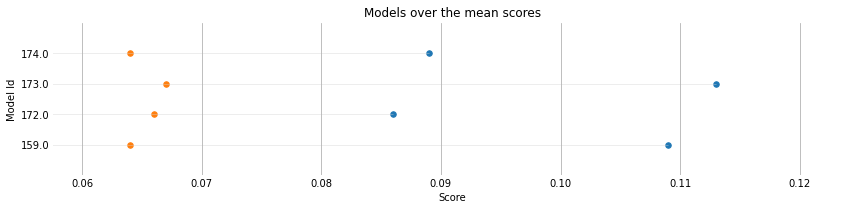

In [47]:
means = DF[["Id", "model","mean_tbc", "mean_wiki"]].copy()
means.mask(means[["mean_tbc", "mean_wiki"]]<=np.mean(means[["mean_tbc", "mean_wiki"]]*1.2), inplace=True)
means.mask(means["model"] != "Attention-1", inplace = True)
means.dropna(inplace=True)
verticalDotPlot(means["Id"], means["mean_tbc"], means["mean_wiki"], "Models over the mean scores","Score", "Model Id")

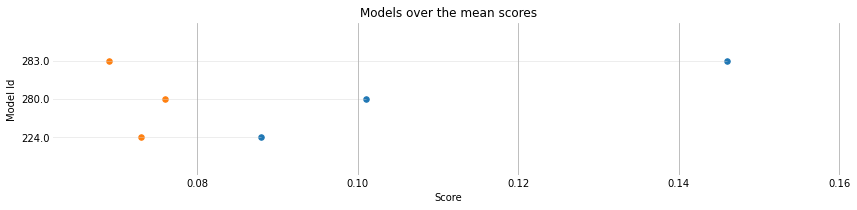

In [8]:
means = DF[["Id", "model","mean_tbc", "mean_wiki"]].copy()
means.mask(means[["mean_tbc", "mean_wiki"]]<=np.mean(means[["mean_tbc", "mean_wiki"]]*1.3), inplace=True)
means.mask(means["model"] != "Parallel-1", inplace = True)
means.dropna(inplace=True)
verticalDotPlot(means["Id"], means["mean_tbc"], means["mean_wiki"], "Models over the mean scores","Score", "Model Id")


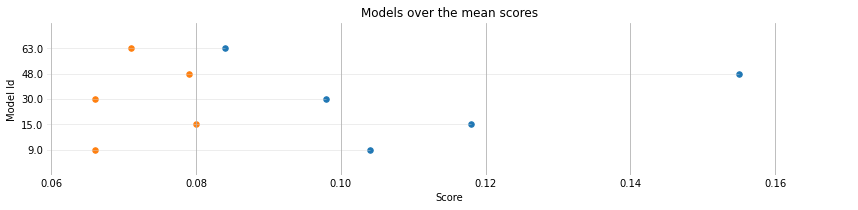

In [12]:
means = DF[["Id", "model","mean_tbc", "mean_wiki"]].copy()
means.mask(means[["mean_tbc", "mean_wiki"]]<=np.mean(means[["mean_tbc", "mean_wiki"]]*1.25), inplace=True)
means.mask(means["model"] != "parallel-0.15", inplace = True)
means.dropna(inplace=True)
verticalDotPlot(means["Id"], means["mean_tbc"], means["mean_wiki"], "Models over the mean scores","Score", "Model Id")

In [17]:
best = DF.iloc[[15, 48, 63, 135, 138, 141, 159, 172, 173, 224, 280, 283]]
best

,n_sentences,batch_size,avg_len,max_len,generation_method,masked_portion,max_iter,std_len,init_mask_prob,temperature,sample,top_k,mean_tbc,std_tbc,mean_wiki,std_wiki,count,model,Id
15,50,10,40,50,parallel,0.15,100,0,1,10.0,False,0,0.118,0.097,0.080,0.024,5,parallel-0.15,15
48,50,10,40,50,parallel,0.15,500,0,1,1.0,False,0,0.155,0.074,0.079,0.030,5,parallel-0.15,48
63,50,10,40,50,parallel,0.15,500,5,1,0.1,False,0,0.084,0.033,0.071,0.021,5,parallel-0.15,63
63,50,10,40,50,sequential,1.00,500,5,1,0.1,False,0,0.293,0.098,0.118,0.035,5,sequential,135
66,50,10,40,50,sequential,1.00,500,5,1,1.0,False,0,0.261,0.059,0.113,0.007,5,sequential,138
69,50,10,40,50,sequential,1.00,500,5,1,10.0,False,0,0.360,0.052,0.132,0.018,5,sequential,141
15,50,10,40,50,attention,1.00,100,0,1,10.0,False,0,0.109,0.020,0.064,0.002,5,Attention-1,159
28,50,10,40,50,attention,1.00,100,5,1,0.1,True,0,0.086,0.015,0.066,0.009,5,Attention-1,172
29,50,10,40,50,attention,1.00,100,5,1,0.1,True,100,0.113,0.018,0.067,0.009,5,Attention-1,173
8,50,10,40,50,parallel,1.00,500,5,1,1.0,True,100,0.088,0.012,0.073,0.005,5,Parallel-1,224


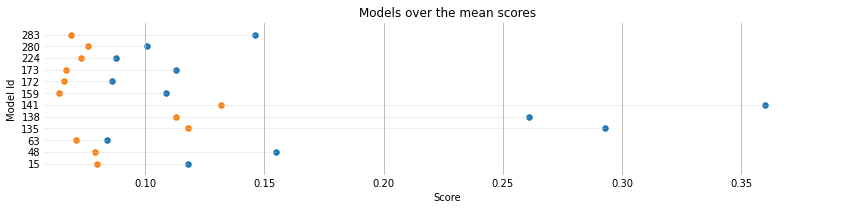

In [18]:
verticalDotPlot(best["Id"], best["mean_tbc"], best["mean_wiki"], "Models over the mean scores","Score", "Model Id")